In [2]:
# Imports - these are all the imports needed for the assignment
%matplotlib inline
from scipy import stats
import numpy.ma as ma
from scipy.stats import kstest, normaltest

import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# 1a) Load the nba csv files

# YOUR CODE HERE
df_2006 = pd.read_csv('clean_players_2006.csv')

In [4]:
df_2006

Unnamed: 0  PLAYER_ID          PLAYER_NAME     TEAM_ID TEAM_ABBREVIATION  \
0             0        243          Aaron McKie  1610612747               LAL   
1             1       1425       Aaron Williams  1610612746               LAC   
2             2     200747        Adam Morrison  1610612766               CHA   
3             3       1502         Adonal Foyle  1610612744               GSW   
4             4       1559       Adrian Griffin  1610612741               CHI   
5             5       1733        Al Harrington  1610612744               GSW   
6             6       2744         Al Jefferson  1610612738               BOS   
7             7     101187        Alan Anderson  1610612766               CHA   
8             8        673       Alan Henderson  1610612755               PHI   
9             9     200792    Alexander Johnson  1610612763               MEM   
10           10     200810            Allan Ray  1610612738               BOS   
11           11        947        Allen Iverson  1610612743               DEN   
12           12        297      Alonzo Mourning  1610612748               MIA   
13           14       2405    Amar'e Stoudemire  1610612756               PHX   
14           15     101161         Amir Johnson  1610612765               DET   
15           16       2760     Anderson Varejao  1610612739               CLE   
16           17     101154       Andray Blatche  1610612764               WAS   
17           19       2810          Andre Brown  1610612760               SEA   
18           20       2738       Andre Iguodala  1610612755               PHI   
19           21       1889         Andre Miller  1610612755               PHI   
20           22     200745      Andrea Bargnani  1610612761               TOR   
21           23       2601  Andreas Glyniadakis  1610612760               SEA   
22           24       1905     Andrei Kirilenko  1610612762               UTA   
23           25       2804       Andres Nocioni  1610612741               CHI   
24           26     101106         Andrew Bogut  1610612749               MIL   
25           27     101115         Andrew Bynum  1610612747               LAL   
26           28       2740      Andris Biedrins  1610612744               GSW   
27           29       1712       Antawn Jamison  1610612764               WAS   
28           31       1533      Anthony Johnson  1610612737               ATL   
29           32       1515       Anthony Parker  1610612761               TOR   
..          ...        ...                  ...         ...               ...   
396         424       1501           Tim Thomas  1610612746               LAC   
397         425       2754           Tony Allen  1610612738               BOS   
398         426       1499          Tony Battie  1610612753               ORL   
399         427       2225          Tony Parker  1610612759               SAS   
400         428       1503        Tracy McGrady  1610612745               HOU   
401         429     101143        Travis Diener  1610612753               ORL   
402         430       2566        Travis Outlaw  1610612757               POR   
403         431       2239      Trenton Hassell  1610612750               MIN   
404         432       2772         Trevor Ariza  1610612753               ORL   
405         433       1607          Troy Hudson  1610612750               MIN   
406         434       2211          Troy Murphy  1610612754               IND   
407         435       1731           Tyronn Lue  1610612737               ATL   
408         436     200748         Tyrus Thomas  1610612741               CHI   
409         437       2199       Tyson Chandler  1610612740               NOK   
410         438       2617        Udonis Haslem  1610612748               MIA   
411         440       2779   Vassilis Spanoulis  1610612745               HOU   
412         441       2751       Viktor Khryapa  1610612741               CHI   
413         442       1713         V

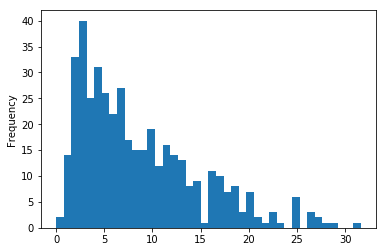

In [5]:
df_2006['PTS'].plot.hist(bins=40)

In [7]:
df_2006.columns[1:]
#pts_2016 = df_2016.as_matrix(columns=df_2016.columns[27:])
#x = pts_2016 #The array needs to be larger than 20, just an example
#mx = ma.masked_array(x)
#z,pval = mstats.normaltest(mx)

#if(pval < 0.055):
#   print("Not normal distribution")

Index(['PLAYER_ID', 'PLAYER_NAME', 'TEAM_ID', 'TEAM_ABBREVIATION', 'AGE', 'GP',
       'W', 'L', 'W_PCT', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A',
       'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'TOV',
       'STL', 'BLK', 'BLKA', 'PF', 'PFD', 'PTS', 'PLUS_MINUS',
       'NBA_FANTASY_PTS', 'DD2', 'TD3', 'GP_RANK', 'W_RANK', 'L_RANK',
       'W_PCT_RANK', 'MIN_RANK', 'FGM_RANK', 'FGA_RANK', 'FG_PCT_RANK',
       'FG3M_RANK', 'FG3A_RANK', 'FG3_PCT_RANK', 'FTM_RANK', 'FTA_RANK',
       'FT_PCT_RANK', 'OREB_RANK', 'DREB_RANK', 'REB_RANK', 'AST_RANK',
       'TOV_RANK', 'STL_RANK', 'BLK_RANK', 'BLKA_RANK', 'PF_RANK', 'PFD_RANK',
       'PTS_RANK', 'PLUS_MINUS_RANK', 'NBA_FANTASY_PTS_RANK', 'DD2_RANK',
       'TD3_RANK', 'CFID', 'CFPARAMS'],
      dtype='object')

In [8]:
z,pval = stats.normaltest(df_2006['PTS'])
print(z, pval)
if(pval < 0.05):
    print('PTS Is not from a Normal Dist')
else:
    print('PTS Is likley from a Normal Dist')

size = df_2006['PTS'].size
x = scipy.arange(size)
param = stats.gamma.fit(df_2006['PTS'])
stat, kpval = kstest(df_2006['PTS'], 'gamma', param)
print(stat, kpval)
if(kpval < 0.05):
    print('PTS Is not from a Gamma Dist')
else:
    print('PTS Is likley from a Gamma Dist')
    
param = stats.lognorm.fit(df_2006['PTS'])
stat, kpval = kstest(df_2006['PTS'], 'lognorm', param)
print(stat, kpval)
if(kpval < 0.05):
    print('PTS Is not from a Log norm Dist')
else:
    print('PTS Is likley from a Log norm Dist')

64.2618924721 1.11098284097e-14
PTS Is not from a Normal Dist
0.047810398445 0.276306556502
PTS Is likley from a Gamma Dist
0.0492030137325 0.246020062094
PTS Is likley from a Log norm Dist


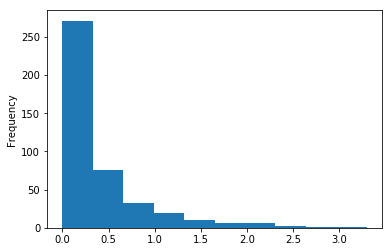

In [9]:
df_2006['BLK'].plot.hist(bins=10)

In [10]:
z,pval = stats.normaltest(df_2006['BLK'])
print(z, pval)
if(pval < 0.05):
    print('BLK Is not from a Normal Dist')
else:
    print('BLK Is likley from a Normal Dist')
    
size = df_2006['BLK'].size
x = scipy.arange(size)
param = stats.expon.fit(df_2006['BLK'])
stat, kpval = kstest(df_2006['BLK'], 'expon', param)
print(stat, kpval)
if(kpval < 0.05):
    print('BLK Is not from a Exponen Dist')
else:
    print('BLK Is likley from a Exponen Dist')
param = stats.gamma.fit(df_2006['BLK'])
stat, kpval = kstest(df_2006['BLK'], 'gamma', param)
print(stat, kpval)
if(kpval < 0.05):
    print('BLK Is not from a Gamma Dist')
else:
    print('BLK Is likley from a Gamma Dist')
param = stats.lognorm.fit(df_2006['BLK'])
stat, kpval = kstest(df_2006['BLK'], 'lognorm', param)
print(stat, kpval)
if(kpval < 0.05):
    print('BLK Is not from a Log norm Dist')
else:
    print('BLK Is likley from a Log norm Dist')
param = stats.chi2.fit(df_2006['BLK'])
stat, kpval = kstest(df_2006['BLK'], 'chi2', param)
print(stat, kpval)
if(kpval < 0.05):
    print('BLK Is not from a Chisq Dist')
else:
    print('BLK Is likley from a Chisq Dist')


233.499165608 1.97833768457e-51
BLK Is not from a Normal Dist
0.154858603494 2.18355133974e-09
BLK Is not from a Exponen Dist
0.166650284494 8.2633233589e-11
BLK Is not from a Gamma Dist
0.142971830757 4.62485791886e-08
BLK Is not from a Log norm Dist
0.365030982975 0.0
BLK Is not from a Chisq Dist


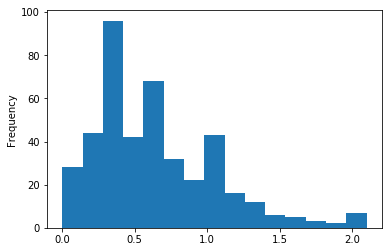

In [11]:
df_2006['STL'].plot.hist(bins=15)

In [12]:
z,pval = stats.normaltest(df_2006['STL'])
print(z, pval)
if(pval < 0.05):
    print('STL Is not from a Normal Dist')
else:
    print('STL Is likley from a Normal Dist')
    
size = df_2006['STL'].size
x = scipy.arange(size)
param = stats.gamma.fit(df_2006['STL'])
stat, kpval = kstest(df_2006['STL'], 'gamma', param)
print(stat, kpval)
if(kpval < 0.05):
    print('STL Is not from a Gamma Dist')
else:
    print('STL Is likley from a Gamma Dist')

param = stats.expon.fit(df_2006['STL'])
stat, kpval = kstest(df_2006['STL'], 'expon', param)
print(stat, kpval)
if(kpval < 0.05):
    print('STL Is not from a Exponen Dist')
else:
    print('STL Is likley from a Exponen Dist')

param = stats.lognorm.fit(df_2006['STL'])
stat, kpval = kstest(df_2006['STL'], 'lognorm', param)
print(stat, kpval)
if(kpval < 0.05):
    print('STL Is not from a Log norm Dist')
else:
    print('STL Is likley from a Log norm Dist')
    

66.2315874366 4.14947855355e-15
STL Is not from a Normal Dist
0.0695310018508 0.0309744546058
STL Is not from a Gamma Dist
0.202663115473 8.881784197e-16
STL Is not from a Exponen Dist
0.0737872523136 0.0183508182123
STL Is not from a Log norm Dist


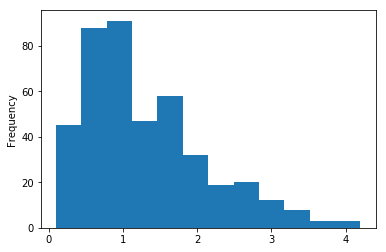

In [13]:
df_2006['TOV'].plot.hist(bins=12)

In [14]:
z,pval = stats.normaltest(df_2006['TOV'])
print(z, pval)
if(pval < 0.05):
    print('TOV Is not from a Normal Dist')
else:
    print('TOV Is likley from a Normal Dist')
    
size = df_2006['TOV'].size
x = scipy.arange(size)
param = stats.gamma.fit(df_2006['TOV'])
stat, kpval = kstest(df_2006['TOV'], 'gamma', param)
print(stat, kpval)
if(kpval < 0.05):
    print('TOV Is not from a Gamma Dist')
else:
    print('TOV Is likley from a Gamma Dist')
    
param = stats.lognorm.fit(df_2006['TOV'])
stat, kpval = kstest(df_2006['TOV'], 'lognorm', param)
print(stat, kpval)
if(kpval < 0.05):
    print('TOV Is not from a Log norm Dist')
else:
    print('TOV Is likley from a Log norm Dist')

53.9885098483 1.89035792941e-12
TOV Is not from a Normal Dist
0.0622209250185 0.0707953624444
TOV Is likley from a Gamma Dist
0.0690183350501 0.032921342787
TOV Is not from a Log norm Dist


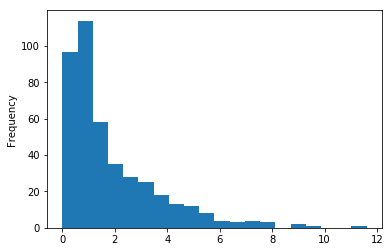

In [15]:
df_2006['AST'].plot.hist(bins=20)

In [16]:
z,pval = stats.normaltest(df_2006['AST'])
print(z, pval)
if(pval < 0.05):
    print('AST Is not from a Normal Dist')
else:
    print('AST Is likley from a Normal Dist')

size = df_2006['AST'].size
x = scipy.arange(size)
param = stats.gamma.fit(df_2006['AST'])
stat, kpval = kstest(df_2006['AST'], 'gamma', param)
print(stat, kpval)
if(kpval < 0.05):
    print('AST Is not from a Gamma Dist')
else:
    print('AST Is likley from a Gamma Dist')

param = stats.lognorm.fit(df_2006['AST'])
stat, kpval = kstest(df_2006['AST'], 'lognorm', param)
print(stat, kpval)
if(kpval < 0.05):
    print('AST Is not from a Log norm Dist')
else:
    print('AST Is likley from a Log norm Dist')

159.048464329 2.90445594484e-35
AST Is not from a Normal Dist
0.065876946241 0.0473615141091
AST Is not from a Gamma Dist
0.0510147659756 0.210484729826
AST Is likley from a Log norm Dist


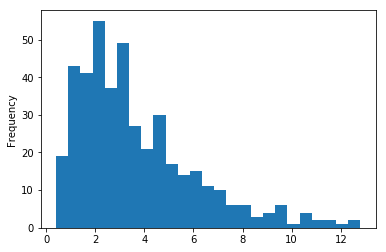

In [17]:
df_2006['REB'].plot.hist(bins=25)

In [18]:
z,pval = stats.normaltest(df_2006['REB'])
print(z, pval)
if(pval < 0.05):
    print('REB Is not from a Normal Dist')
else:
    print('REB Is likley from a Normal Dist')
    
size = df_2006['REB'].size
x = scipy.arange(size)
param = stats.gamma.fit(df_2006['REB'])
stat, kpval = kstest(df_2006['REB'], 'gamma', param)
print(stat, kpval)
if(kpval < 0.05):
    print('REB Is not from a Gamma Dist')
else:
    print('REB Is likley from a Gamma Dist')

param = stats.lognorm.fit(df_2006['REB'])
stat, kpval = kstest(df_2006['REB'], 'lognorm', param)
print(stat, kpval)
if(kpval < 0.05):
    print('REB Is not from a Log norm Dist')
else:
    print('REB Is likley from a Log norm Dist')

90.7872029417 1.93112047036e-20
REB Is not from a Normal Dist
0.0446058084558 0.356410905769
REB Is likley from a Gamma Dist
0.0413521999447 0.453325421541
REB Is likley from a Log norm Dist
